In [1]:
####### os, pickle
import os
import pickle


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

from sklearn.inspection import permutation_importance
import catboost as ctb

import numpy as np
os.chdir('../')
from funciones import* 
from collections import Counter
from imblearn.over_sampling import SMOTE 

In [2]:
from main import X_cat ,y_cat

X_cat: (54484, 6365) y_cat: (54484,)
X: (54849, 10114) y: (54849, 1)


In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y_cat, test_size=0.20, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y

In [4]:
 #Creamos el objeto modelo
 cbc = CatBoostRegressor()

In [5]:
#definimos los mejores parámetros según resultado del gridsearch
parametros = {'depth'         : [10],
              'learning_rate' : [ 0.1, 0.2],
              'iterations'    : [30]}

In [6]:
#Aplicamos el modelo catboost con los mejores parámetros
grid = GridSearchCV(estimator=cbc, param_grid = parametros, cv = 2, n_jobs=-1)
grid.fit(X_train_smote, y_train_smote)

0:	learn: 0.3757970	total: 311ms	remaining: 9.01s
1:	learn: 0.3419404	total: 493ms	remaining: 6.89s
2:	learn: 0.3177592	total: 693ms	remaining: 6.23s
3:	learn: 0.2986395	total: 932ms	remaining: 6.06s
4:	learn: 0.2853835	total: 1.14s	remaining: 5.7s
5:	learn: 0.2754096	total: 1.35s	remaining: 5.4s
6:	learn: 0.2664148	total: 1.54s	remaining: 5.06s
7:	learn: 0.2594748	total: 1.73s	remaining: 4.75s
8:	learn: 0.2540367	total: 1.92s	remaining: 4.47s
9:	learn: 0.2496090	total: 2.11s	remaining: 4.22s
10:	learn: 0.2465190	total: 2.32s	remaining: 4.01s
11:	learn: 0.2430717	total: 2.52s	remaining: 3.78s
12:	learn: 0.2403516	total: 2.72s	remaining: 3.56s
13:	learn: 0.2374949	total: 2.91s	remaining: 3.32s
14:	learn: 0.2352175	total: 3.1s	remaining: 3.1s
15:	learn: 0.2333377	total: 3.29s	remaining: 2.88s
16:	learn: 0.2316648	total: 3.47s	remaining: 2.65s
17:	learn: 0.2295115	total: 3.65s	remaining: 2.43s
18:	learn: 0.2277930	total: 3.84s	remaining: 2.23s
19:	learn: 0.2262856	total: 4.02s	remaining: 

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000018F353159D0>,
             n_jobs=-1,
             param_grid={'depth': [10], 'iterations': [30],
                         'learning_rate': [0.1, 0.2]})

In [7]:
grid.best_params_ #aplicamos estos parámetros

{'depth': 10, 'iterations': 30, 'learning_rate': 0.2}

In [8]:
grid.best_estimator_.feature_importances_

array([0.        , 6.36296673, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [ ]:
dfi = pd.DataFrame()
dfi['importanciaGrid']= grid.best_estimator_.feature_importances_
dfi['Categorías']= X_cat.columns
dfi.sort_values('importanciaGrid',ascending=False).head(20)

,importanciaGrid,Categorías
12,31.583925,"Rubro1_Equipos y suministros de defensa, orden..."
221,8.627164,Rubro2_Materiales estructurales básicos
927,7.903065,Rubro3_Filtros
1,6.362967,Rubro1_Artículos de fabricación y producción
36,4.828520,"Rubro1_Ropa, maletas y productos de aseo personal"
359,3.699360,Rubro2_Vestuario clínico
21,3.606622,Rubro1_Maquinaria para fabricación y transform...
1115,2.838201,Rubro3_Maquinaria para soldadura directa o ind...
186,2.711709,Rubro2_Herramientas manuales
1172,2.316444,Rubro3_Metales base


Text(0.5, 1.0, 'Feature Importance')

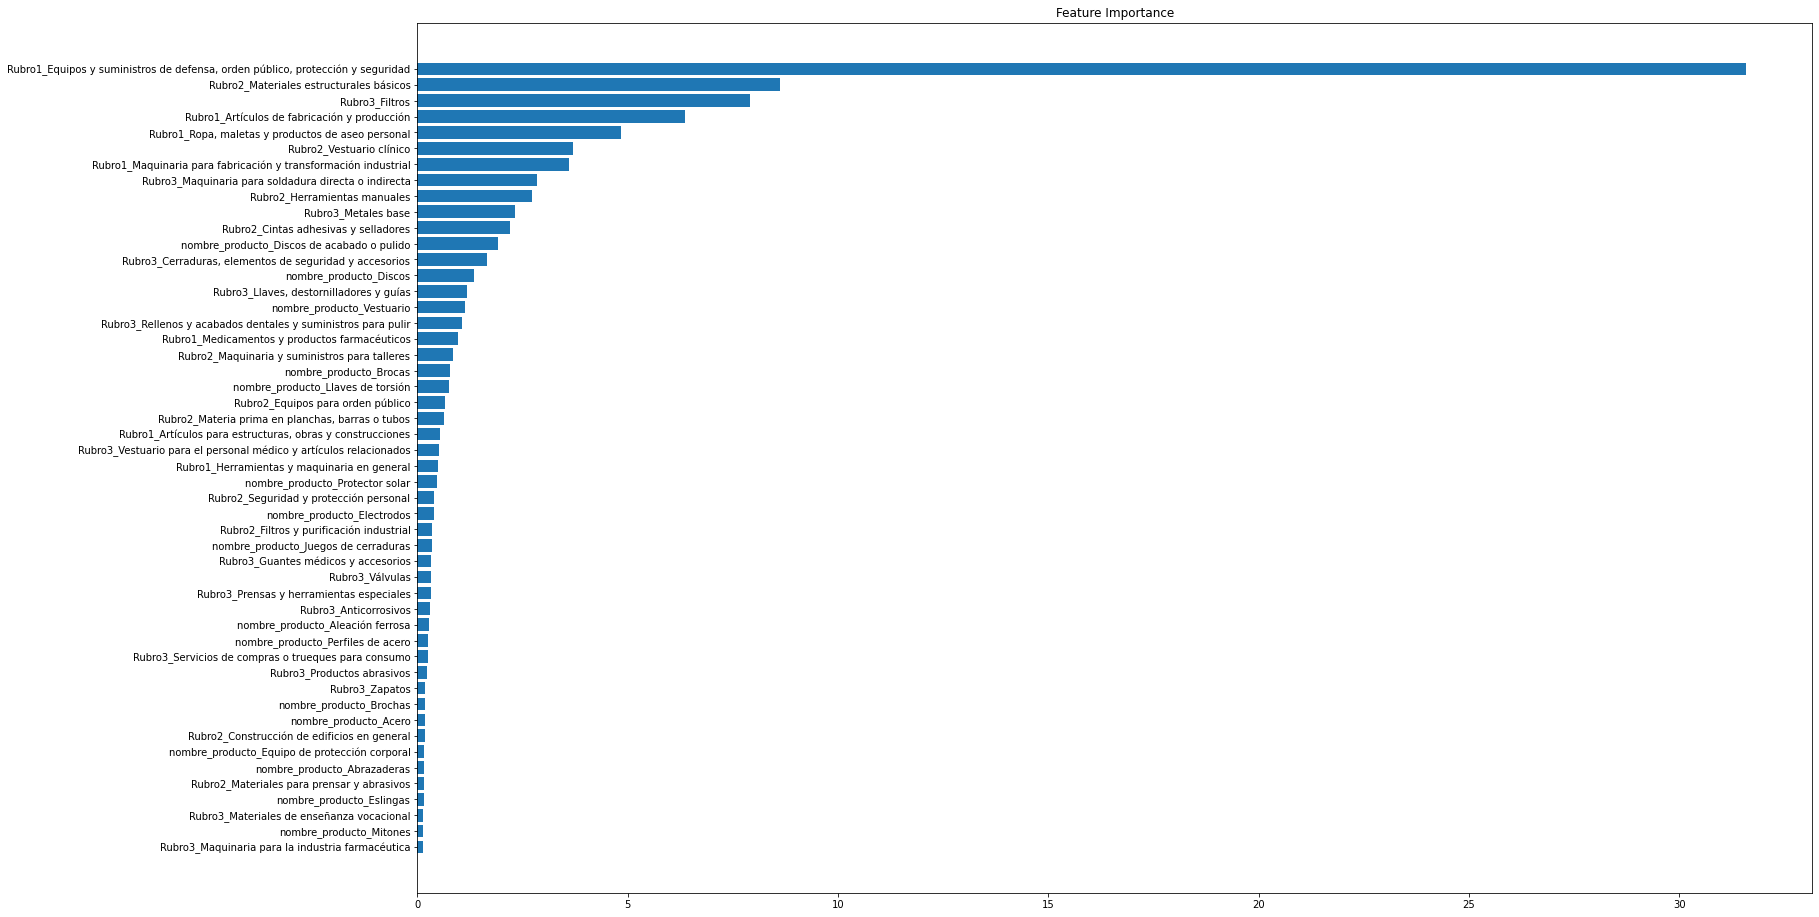

In [11]:
df_imp=dfi.sort_values("importanciaGrid", ascending = False).iloc[0:50]
feature_importanc = df_imp.importanciaGrid
nombres = df_imp.Categorías
fig = plt.figure(figsize=(25, 16))
plt.barh(range(len(nombres),0,-1), feature_importanc, align='center')
plt.yticks(range(len(nombres),0,-1),nombres)
plt.title('Feature Importance')

In [19]:
ci=dfi[(dfi['importanciaGrid']>=0.000000000001)].sort_values('importanciaGrid',ascending=False) #Guardamos las variables que tienen alguna importancia
ci1=ci['Categorías'].values
ci1

array(['Rubro1_Equipos y suministros de defensa, orden público, protección y seguridad',
       'Rubro2_Materiales estructurales básicos', 'Rubro3_Filtros',
       'Rubro1_Artículos de fabricación y producción',
       'Rubro1_Ropa, maletas y productos de aseo personal',
       'Rubro2_Vestuario clínico',
       'Rubro1_Maquinaria para fabricación y transformación industrial',
       'Rubro3_Maquinaria para soldadura directa o indirecta',
       'Rubro2_Herramientas manuales', 'Rubro3_Metales base',
       'Rubro2_Cintas adhesivas y selladores',
       'nombre_producto_Discos de acabado o pulido',
       'Rubro3_Cerraduras, elementos de seguridad y accesorios',
       'nombre_producto_Discos',
       'Rubro3_Llaves, destornilladores y guías',
       'nombre_producto_Vestuario',
       'Rubro3_Rellenos y acabados dentales y suministros para pulir',
       'Rubro1_Medicamentos y productos farmacéuticos',
       'Rubro2_Maquinaria y suministros para talleres',
       'nombre_producto_Broc

In [24]:
#Guardamos en un pickle
fh7 = open('array_categorias_importantes.pkl','wb')
pickle.dump(ci1,fh7)
fh7.close()

c:\Users\diana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='importanciaGrid'>

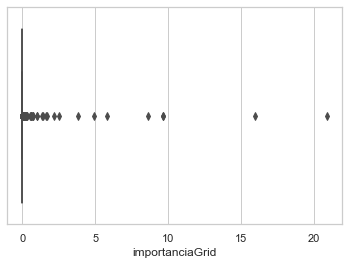

In [12]:
sns.set_theme(style="whitegrid")
sns.boxplot(dfi['importanciaGrid'])

df['Rubro1'].unique().size == 56 <br>
df['Rubro2'].unique().size == 307<br>
df['Rubro3'].unique().size == 1284